<a href="https://colab.research.google.com/github/thrisharadhakrishnan88-lang/amazon-food-reviews-ca2/blob/main/amazon_food_reviews_ca2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA

import string

df = pd.read_csv(
    "Reviews.csv",
    engine="python",
    on_bad_lines="skip"
)

df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [37]:
import pandas as pd

df = pd.read_csv(
    "/content/Reviews.csv",
    engine="python",
    on_bad_lines="skip"
)

df.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [38]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("Reviews.csv")   # change name if needed

# View first 5 rows
df.head()

# Dataset information
df.info()

# Statistical summary
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [39]:
# Check data types
df.dtypes


,0
Id,int64
ProductId,object
UserId,object
ProfileName,object
HelpfulnessNumerator,int64
HelpfulnessDenominator,int64
Score,int64
Time,int64
Summary,object
Text,object


In [40]:
# Check missing values
df.isnull().sum()

# Fill missing Summary with mode
df['Summary'].fillna(df['Summary'].mode()[0], inplace=True)

# Drop rows where Text is missing
df.dropna(subset=['Text'], inplace=True)


/tmp/ipython-input-3824845940.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Summary'].fillna(df['Summary'].mode()[0], inplace=True)


In [41]:
# Check duplicates BEFORE removing
print("Duplicate rows before removal:", df.duplicated().sum())

# Remove duplicates
df = df.drop_duplicates()

# Check duplicates AFTER removing
print("Duplicate rows after removal:", df.duplicated().sum())



Duplicate rows before removal: 0
Duplicate rows after removal: 0


In [42]:
# Calculate Q1, Q3 and IQR
Q1 = df['Score'].quantile(0.25)
Q3 = df['Score'].quantile(0.75)
IQR = Q3 - Q1

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)

# Count rows BEFORE removing outliers
print("Rows before outlier removal:", df.shape[0])

# Remove outliers
df = df[(df['Score'] >= Q1 - 1.5 * IQR) & (df['Score'] <= Q3 + 1.5 * IQR)]

# Count rows AFTER removing outliers
print("Rows after outlier removal:", df.shape[0])



Q1: 4.0
Q3: 5.0
IQR: 1.0
Rows before outlier removal: 568454
Rows after outlier removal: 486417


In [43]:
# Show BEFORE standardization
print("Before standardization:")
print(df['ProfileName'].head())

# Standardize text data
df['ProfileName'] = df['ProfileName'].str.lower()

# Show AFTER standardization
print("\nAfter standardization:")
print(df['ProfileName'].head())



Before standardization:
0                         delmartian
2    Natalia Corres "Natalia Corres"
4      Michael D. Bigham "M. Wassir"
5                     Twoapennything
6                  David C. Sullivan
Name: ProfileName, dtype: object

After standardization:
0                         delmartian
2    natalia corres "natalia corres"
4      michael d. bigham "m. wassir"
5                     twoapennything
6                  david c. sullivan
Name: ProfileName, dtype: object


In [44]:
# Show column names BEFORE renaming
print("Columns before renaming:")
print(df.columns.tolist())

# Rename columns
df.rename(columns={
    'UserId': 'User_ID',
    'ProfileName': 'Profile_Name'
}, inplace=True)

# Show column names AFTER renaming
print("\nColumns after renaming:")
print(df.columns.tolist())


Columns before renaming:
['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text']

Columns after renaming:
['Id', 'ProductId', 'User_ID', 'Profile_Name', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text']


In [45]:
# BEFORE conversion
print("Before conversion (Time column):")
print(df['Time'].head())
print("Data type:", df['Time'].dtype)

# Convert Unix time to Date
df['Review_Date'] = pd.to_datetime(df['Time'], unit='s')

# AFTER conversion
print("\nAfter conversion (Review_Date column):")
print(df['Review_Date'].head())
print("Data type:", df['Review_Date'].dtype)


Before conversion (Time column):
0    1303862400
2    1219017600
4    1350777600
5    1342051200
6    1340150400
Name: Time, dtype: int64
Data type: int64

After conversion (Review_Date column):
0   2011-04-27
2   2008-08-18
4   2012-10-21
5   2012-07-12
6   2012-06-20
Name: Review_Date, dtype: datetime64[ns]
Data type: datetime64[ns]


In [46]:
from sklearn.preprocessing import StandardScaler

# BEFORE scaling
print("Score before scaling:")
print(df['Score'].head())

scaler = StandardScaler()
df['Score_scaled'] = scaler.fit_transform(df[['Score']])

# AFTER scaling
print("\nScore after Standard Scaling:")
print(df['Score_scaled'].head())


Score before scaling:
0    5
2    4
4    5
5    4
6    5
Name: Score, dtype: int64

Score after Standard Scaling:
0    0.539328
2   -1.041642
4    0.539328
5   -1.041642
6    0.539328
Name: Score_scaled, dtype: float64


In [47]:
from sklearn.preprocessing import MinMaxScaler

# BEFORE normalization
print("HelpfulnessNumerator before normalization:")
print(df['HelpfulnessNumerator'].head())

mm = MinMaxScaler()
df['HelpfulnessNumerator_norm'] = mm.fit_transform(df[['HelpfulnessNumerator']])

# AFTER normalization
print("\nHelpfulnessNumerator after Min-Max normalization:")
print(df['HelpfulnessNumerator_norm'].head())


HelpfulnessNumerator before normalization:
0    1
2    1
4    0
5    0
6    0
Name: HelpfulnessNumerator, dtype: int64

HelpfulnessNumerator after Min-Max normalization:
0    0.001155
2    0.001155
4    0.000000
5    0.000000
6    0.000000
Name: HelpfulnessNumerator_norm, dtype: float64


In [48]:
# BEFORE binning
print("Score values:")
print(df['Score'].head())

# Binning scores
df['Score_Category'] = pd.cut(
    df['Score'],
    bins=3,
    labels=['Low', 'Medium', 'High']
)

# AFTER binning
print("\nScore categories:")
print(df[['Score', 'Score_Category']].head())


Score values:
0    5
2    4
4    5
5    4
6    5
Name: Score, dtype: int64

Score categories:
   Score Score_Category
0      5           High
2      4         Medium
4      5           High
5      4         Medium
6      5           High


In [49]:
# BEFORE aggregation
print("Sample user scores:")
print(df[['User_ID', 'Score']].head())

# Aggregation
avg_score_per_user = df.groupby('User_ID')['Score'].mean().reset_index()

# AFTER aggregation
print("\nAverage score per user:")
print(avg_score_per_user.head())


Sample user scores:
          User_ID  Score
0  A3SGXH7AUHU8GW      5
2   ABXLMWJIXXAIN      4
4  A1UQRSCLF8GW1T      5
5   ADT0SRK1MGOEU      4
6  A1SP2KVKFXXRU1      5

Average score per user:
              User_ID  Score
0  #oc-R103C0QSV1DF5E    5.0
1  #oc-R109MU5OBBZ59U    5.0
2  #oc-R10LFEMQEW6QGZ    5.0
3  #oc-R10LT57ZGIB140    3.0
4  #oc-R11D9D7SHXIJB9    5.0


In [50]:
mean_score = df['Score'].mean()
print("Mean of Score:", mean_score)


Mean of Score: 4.6588626631059356


In [51]:
median_score = df['Score'].median()
print("Median of Score:", median_score)


Median of Score: 5.0


In [52]:
mode_score = df['Score'].mode()
print("Mode of Score:")
print(mode_score)


Mode of Score:
0    5
Name: Score, dtype: int64


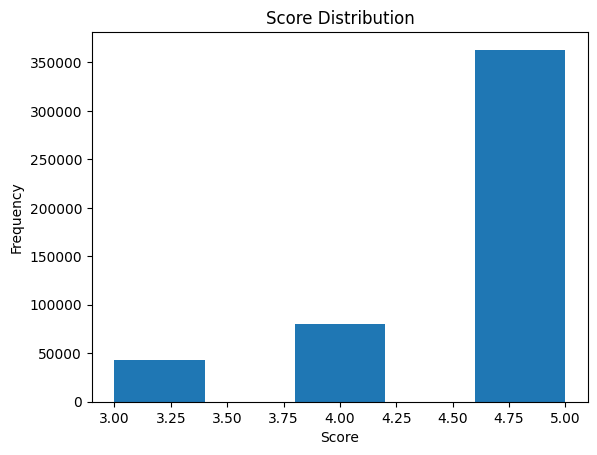

In [53]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(df['Score'], bins=5)
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Score Distribution")
plt.show()


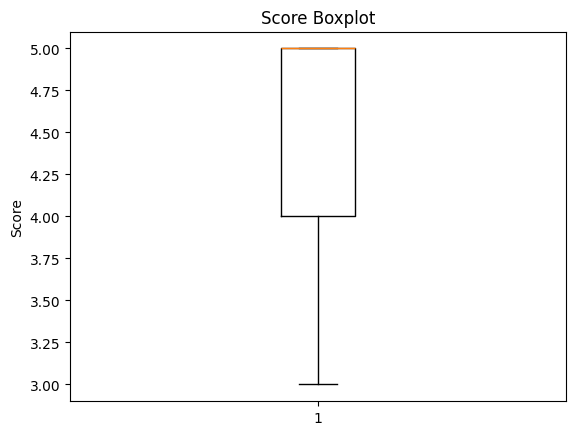

In [54]:
plt.figure()
plt.boxplot(df['Score'])
plt.ylabel("Score")
plt.title("Score Boxplot")
plt.show()


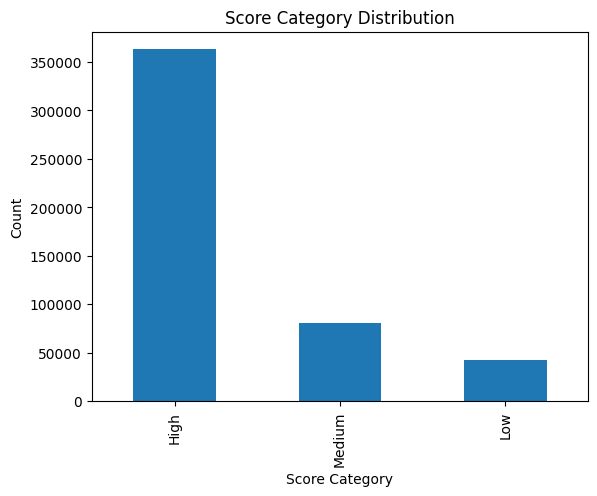

In [55]:
plt.figure()
df['Score_Category'].value_counts().plot(kind='bar')
plt.xlabel("Score Category")
plt.ylabel("Count")
plt.title("Score Category Distribution")
plt.show()


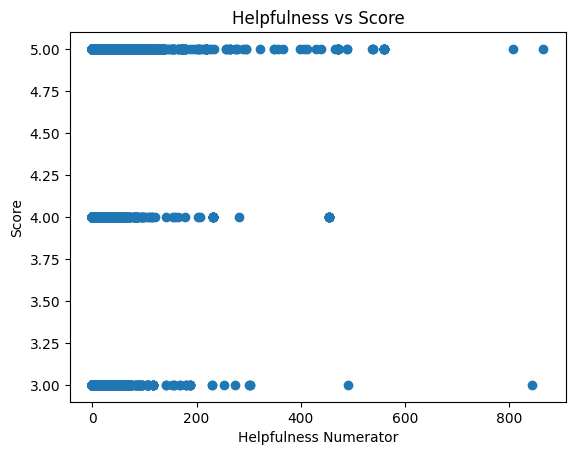

In [56]:
plt.figure()
plt.scatter(df['HelpfulnessNumerator'], df['Score'])
plt.xlabel("Helpfulness Numerator")
plt.ylabel("Score")
plt.title("Helpfulness vs Score")
plt.show()


In [57]:
# BEFORE one-hot encoding
print("Score_Category before encoding:")
print(df['Score_Category'].head())

# One-hot encoding
df_encoded = pd.get_dummies(df, columns=['Score_Category'])

# AFTER one-hot encoding
print("\nColumns after one-hot encoding:")
print([col for col in df_encoded.columns if 'Score_Category' in col][:5])

print("\nSample rows after encoding:")
print(df_encoded.filter(like='Score_Category').head())


Score_Category before encoding:
0      High
2    Medium
4      High
5    Medium
6      High
Name: Score_Category, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

Columns after one-hot encoding:
['Score_Category_Low', 'Score_Category_Medium', 'Score_Category_High']

Sample rows after encoding:
   Score_Category_Low  Score_Category_Medium  Score_Category_High
0               False                  False                 True
2               False                   True                False
4               False                  False                 True
5               False                   True                False
6               False                  False                 True


In [58]:
# Create dummy variables
dummy_vars = pd.get_dummies(df['Score_Category'], drop_first=True)

# Display output
print("Dummy variables (drop first):")
print(dummy_vars.head())


Dummy variables (drop first):
   Medium   High
0   False   True
2    True  False
4   False   True
5    True  False
6   False   True


In [59]:
from sklearn.preprocessing import LabelEncoder

# BEFORE label encoding
print("Score_Category before label encoding:")
print(df['Score_Category'].head())

# Label encoding
le = LabelEncoder()
df['Score_Label'] = le.fit_transform(df['Score_Category'])

# AFTER label encoding
print("\nAfter label encoding:")
print(df[['Score_Category', 'Score_Label']].head())


Score_Category before label encoding:
0      High
2    Medium
4      High
5    Medium
6      High
Name: Score_Category, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

After label encoding:
  Score_Category  Score_Label
0           High            0
2         Medium            2
4           High            0
5         Medium            2
6           High            0


In [60]:
# BEFORE feature extraction
print("Review_Date column:")
print(df['Review_Date'].head())

# Feature extraction
df['Review_Year'] = df['Review_Date'].dt.year

# AFTER feature extraction
print("\nExtracted Review_Year:")
print(df[['Review_Date', 'Review_Year']].head())


Review_Date column:
0   2011-04-27
2   2008-08-18
4   2012-10-21
5   2012-07-12
6   2012-06-20
Name: Review_Date, dtype: datetime64[ns]

Extracted Review_Year:
  Review_Date  Review_Year
0  2011-04-27         2011
2  2008-08-18         2008
4  2012-10-21         2012
5  2012-07-12         2012
6  2012-06-20         2012


In [61]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# BEFORE scaling
print("HelpfulnessDenominator before scaling:")
print(df['HelpfulnessDenominator'].head())

# Scaling
df['HelpfulnessDenominator_scaled'] = scaler.fit_transform(
    df[['HelpfulnessDenominator']]
)

# AFTER scaling
print("\nHelpfulnessDenominator after scaling:")
print(df['HelpfulnessDenominator_scaled'].head())


HelpfulnessDenominator before scaling:
0    1
2    1
4    0
5    0
6    0
Name: HelpfulnessDenominator, dtype: int64

HelpfulnessDenominator after scaling:
0   -0.112563
2   -0.112563
4   -0.238820
5   -0.238820
6   -0.238820
Name: HelpfulnessDenominator_scaled, dtype: float64


In [62]:
import string

# BEFORE removing punctuation
print("Original Text:")
print(df['Text'].head(3))

# Function to remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

# Apply function
df['Clean_Text'] = df['Text'].apply(remove_punctuation)

# AFTER removing punctuation
print("\nText after removing punctuation:")
print(df['Clean_Text'].head(3))


Original Text:
0    I have bought several of the Vitality canned d...
2    This is a confection that has been around a fe...
4    Great taffy at a great price.  There was a wid...
Name: Text, dtype: object

Text after removing punctuation:
0    I have bought several of the Vitality canned d...
2    This is a confection that has been around a fe...
4    Great taffy at a great price  There was a wide...
Name: Clean_Text, dtype: object


In [63]:
# BEFORE tokenization
print("Clean text before tokenization:")
print(df['Clean_Text'].head(3))

# Tokenization
df['Tokens'] = df['Clean_Text'].apply(lambda x: x.split())

# AFTER tokenization
print("\nTokens after tokenization:")
print(df['Tokens'].head(3))


Clean text before tokenization:
0    I have bought several of the Vitality canned d...
2    This is a confection that has been around a fe...
4    Great taffy at a great price  There was a wide...
Name: Clean_Text, dtype: object

Tokens after tokenization:
0    [I, have, bought, several, of, the, Vitality, ...
2    [This, is, a, confection, that, has, been, aro...
4    [Great, taffy, at, a, great, price, There, was...
Name: Tokens, dtype: object


In [64]:
# BEFORE lowercase conversion
print("Text before lowercase conversion:")
print(df['Clean_Text'].head(3))

# Convert to lowercase
df['Clean_Text'] = df['Clean_Text'].str.lower()

# AFTER lowercase conversion
print("\nText after lowercase conversion:")
print(df['Clean_Text'].head(3))


Text before lowercase conversion:
0    I have bought several of the Vitality canned d...
2    This is a confection that has been around a fe...
4    Great taffy at a great price  There was a wide...
Name: Clean_Text, dtype: object

Text after lowercase conversion:
0    i have bought several of the vitality canned d...
2    this is a confection that has been around a fe...
4    great taffy at a great price  there was a wide...
Name: Clean_Text, dtype: object
